In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('agent_1_data.csv')

In [3]:
c = []
for i in range(len(df)):
    arr = []
    for arr in df['x'][i].split('\n'):
        arr = arr.replace('[', '').replace(']', '').split()
        arr = [int(m) for m in arr]
    arr = np.asarray(arr)
    arr = arr/arr.max()
    c.append(np.asarray(arr))
x_train = np.asarray(c)

[1.   0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75
 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75]
[1.   0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75
 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75]
[0.25 0.75 0.75 0.75 0.75 1.   0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75
 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75]
[1.   0.75 0.75 0.75 0.75 0.25 0.75 0.75 0.75 0.75 0.5  0.75 0.75 0.75
 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75]
[1.   0.75 0.75 0.75 0.75 0.25 0.5  0.75 0.75 0.75 0.5  0.75 0.75 0.75
 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75]
[0.25 1.   0.75 0.75 0.75 0.25 0.5  0.75 0.75 0.75 0.5  0.75 0.75 0.75
 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75]


In [4]:
out = []
for i in range(len(df)):
    a = df['y'][i].replace('[', '').replace(']', '').replace(',','').split()
    a = [int(m) for m in a]
    out.append(np.asarray(a))
y_train = np.asarray(out)

In [5]:
y_test = y_train[0]
x_test = x_train[0]

In [6]:
x_train.shape

(6, 25)

In [7]:
a = []
for i in range(len(y_train)):
    indices = zip(*np.where(y_train[i] == 1))
    for row in indices:
        a.append(row)
y_train = np.asarray(a)

    # y_train[0]

In [8]:
#sequential is the basic model
model = tf.keras.models.Sequential()

# we add hidden layers into our network. 128 is the number of neurons that we use
# relu is a basic activation sigmoid function
# softmax is used for probability distribution (used in final/output layer with 10 neurons)
# we reduce 28x28 array to a flatten layer as it is multidimensional and hard to compute
# model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(4, activation = tf.nn.softmax))

#parameters for training for the model

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

print('x_train', x_train.shape)
print('\ny_train', y_train.shape)
model.fit(x_train,y_train, epochs = 3)

x_train (6, 25)

y_train (6, 1)
Epoch 1/3
1/1 [==============================] - 0s 418ms/step - loss: 1.6278 - accuracy: 0.0000e+00
Epoch 2/3
1/1 [==============================] - 0s 4ms/step - loss: 1.4682 - accuracy: 0.0000e+00
Epoch 3/3
1/1 [==============================] - 0s 4ms/step - loss: 1.3281 - accuracy: 0.0000e+00


In [9]:
x_test = np.asarray([x_test])

In [10]:
# calculate the validation loss
val_loss, val_accuracy = model.evaluate(x_train, np.asarray(y_train))
print(val_loss, val_accuracy)

1/1 [==============================] - 0s 159ms/step - loss: 1.2103 - accuracy: 0.8333
1.2103146314620972 0.8333333134651184


In [11]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [12]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [13]:
predictions = new_model.predict(x_test)

In [14]:
print(predictions[0])
print(predictions[0].max())

[0.1947099  0.3240646  0.27810824 0.20311731]
0.3240646


In [15]:
indices = zip(np.where(predictions[0] == predictions[0].max()))

for row in indices:
    if row[0][0] == 0:
        print('up')
    elif row[0][0] == 1:
        print('down')
    elif row[0][0] == 2:
        print('left')
    elif row[0][0] == 3:
        print('right')

down


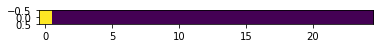

In [16]:
plt.imshow(x_test)

Math